In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("placement.csv")

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [3]:
df = df.iloc[:,1:]

In [10]:
print(df)

    cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]


In [11]:
df.shape

(100, 3)

In [12]:
import matplotlib.pyplot as plt

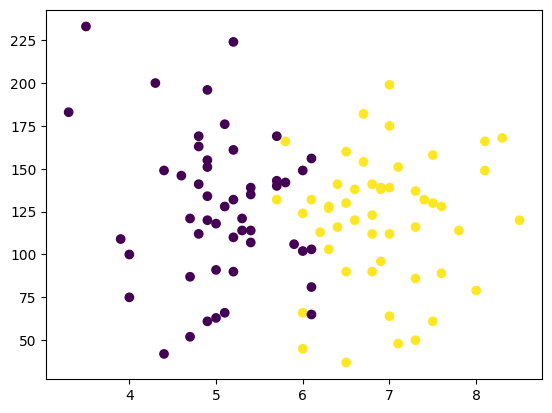

In [15]:
plt.scatter(df["cgpa"],df["iq"],c= df["placement"])


In [19]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [25]:
X_train

,cgpa,iq
7,5.0,63.0
73,4.9,61.0
77,7.3,50.0
25,5.0,91.0
52,7.0,175.0
...,...,...
40,4.9,134.0
17,3.3,183.0
75,4.8,169.0
74,6.7,154.0


In [27]:
from sklearn.preprocessing import StandardScaler


In [29]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
print(X_train)

[[-0.88263033 -1.47297721]
 [-0.96992344 -1.52159031]
 [ 1.12511119 -1.78896241]
 [-0.88263033 -0.79239368]
 [ 0.86323186  1.2493569 ]
 [ 0.25218009 -0.50071502]
 [ 0.77593875  0.35001439]
 [-0.96992344  0.66599959]
 [-1.40638898 -1.98341485]
 [-1.14450965 -0.06319704]
 [ 1.2124043   0.20417506]
 [ 0.3394732   0.42293405]
 [ 0.86323186  1.83271421]
 [-0.00969923  0.61738649]
 [-0.620751   -0.23334292]
 [-0.00969923  0.00972262]
 [-0.79533722  0.10694884]
 [-0.96992344 -0.0875036 ]
 [ 0.68864564 -0.81670023]
 [ 1.12511119 -0.18472981]
 [-0.00969923 -0.52502158]
 [-1.75556142 -1.18129855]
 [-0.18428545  0.4472406 ]
 [-0.70804411  0.90906514]
 [ 0.68864564 -0.01458393]
 [ 1.38699051  0.10694884]
 [-1.40638898  0.61738649]
 [-2.19202697  2.65913707]
 [ 0.86323186  0.37432094]
 [-0.09699234 -0.42779536]
 [-0.70804411  2.44037808]
 [-0.27157856  1.10351758]
 [-1.84285453 -0.3548757 ]
 [-0.00969923 -1.91049519]
 [-0.00969923 -1.40005754]
 [ 0.86323186 -1.44867065]
 [ 1.2996974   0.15556195]
 

In [30]:
X_test = scalar.transform(X_test)
print(X_test)

[[-0.96992344  0.76322581]
 [ 1.56157673 -0.23334292]
 [-1.23180276  0.54446682]
 [-0.53345789 -0.23334292]
 [ 0.07759387  0.78753237]
 [-0.620751   -0.06319704]
 [ 0.51405942 -0.0875036 ]
 [-1.14450965 -0.8896199 ]
 [-0.53345789  0.27709472]
 [ 1.12511119 -0.91392645]]


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf = LogisticRegression()
clf.fit(X_train,y_train) #model train

LogisticRegression()

In [38]:
#evaluate
y_pred = clf.predict(X_test)

In [37]:
y_test

,placement
76,0
55,1
39,0
41,0
8,0
2,0
20,1
23,0
49,0
90,1


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

<Axes: >

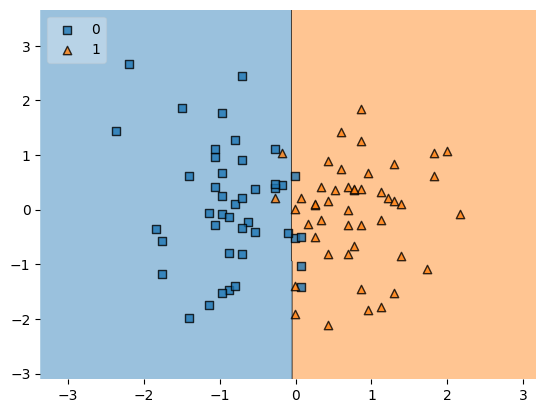

In [44]:
!#pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.values,clf=clf,legend = 2)

In [45]:
import pickle

In [47]:
pickle.dump(clf,open('model.pkl','wb'))

In [49]:
iq = float(input("Enter your IQ: "))
cgpa = float(input("Enter your CGPA: "))
def predict_placement(iq, cgpa):

    features = [[iq, cgpa]]
    y_pred = clf.predict(features)
    return y_pred[0]

result = predict_placement(iq, cgpa)

if result == 1:
    print("🎉 Congratulations! You are likely to get placed.")
else:
    print("❗ You may not be placed. Work on your profile.")

Enter your IQ: 26
Enter your CGPA: 9.0
🎉 Congratulations! You are likely to get placed.
